In [24]:
install.packages("ggplot2")
install.packages("dplyr")
install.packages("reshape2")


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [25]:
# Load necessary libraries
library(ggplot2)
library(dplyr)
library(reshape2)

In [ ]:
data <- read.csv("CrimesOnWomenData.csv")

In [ ]:
data$State <- tolower(trimws(data$State))

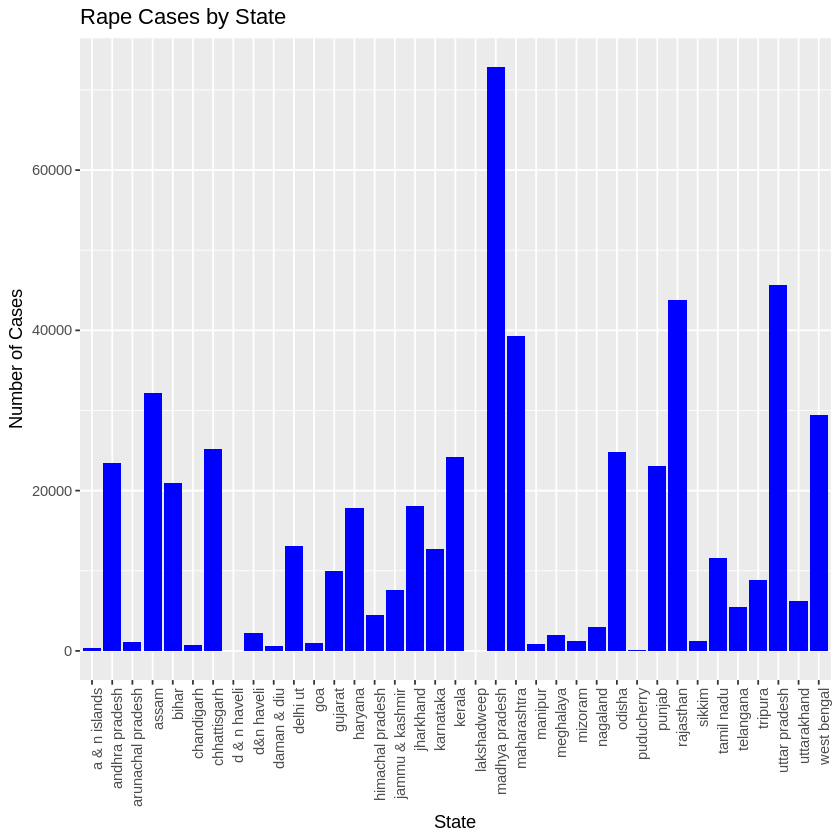

In [ ]:
# Bar Chart: Number of Rape cases by State
ggplot(data, aes(x = State, y = Rape)) +
  geom_bar(stat = "identity", fill = "blue") +
  theme(axis.text.x = element_text(angle = 90, hjust = 1)) +
  labs(title = "Rape Cases by State", x = "State", y = "Number of Cases")

**Observation :- Madya Pradesh Has Highesh Number of Reported Rape Cases while Laskyadeep has 0**

In [ ]:
install.packages("plotly")
library(plotly)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘lazyeval’, ‘crosstalk’



Attaching package: ‘plotly’


The following object is masked from ‘package:ggplot2’:

    last_plot


The following object is masked from ‘package:stats’:

    filter


The following object is masked from ‘package:graphics’:

    layout




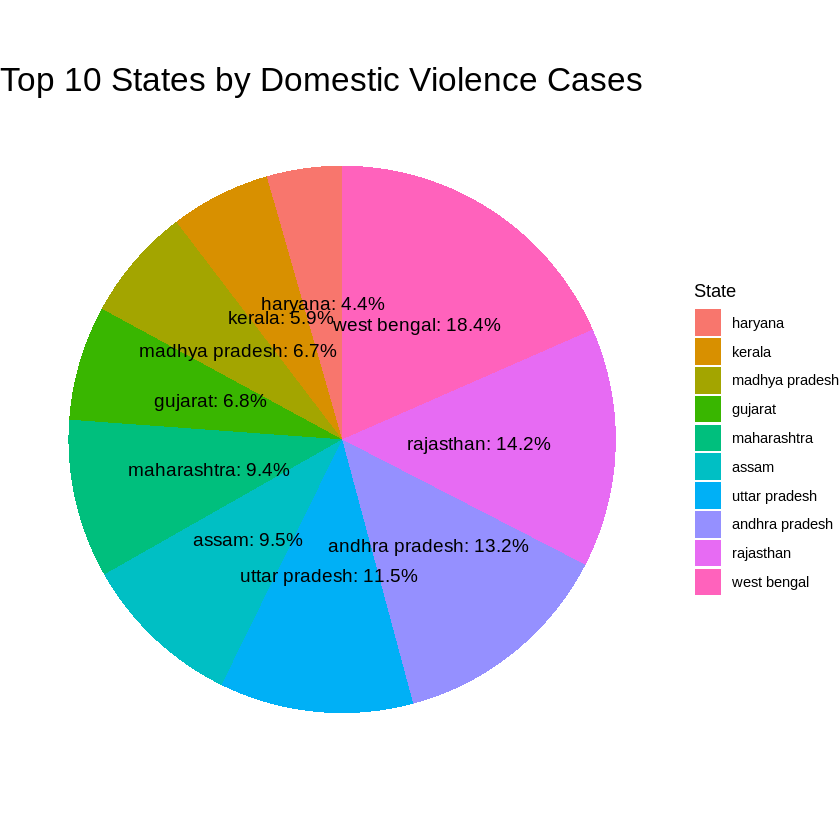

In [ ]:
# Summarize DV cases by state and filter top states
top_n_states <- 10  # Adjust this value to display more or fewer states
pie_data <- data %>%
  group_by(State) %>%
  summarise(DV = sum(DV)) %>%
  arrange(desc(DV)) %>%
  head(top_n_states)

# Calculate percentage of total DV cases
pie_data <- pie_data %>%
  mutate(Percentage = DV / sum(DV) * 100)

# Reorder the levels of the state factor based on DV cases
pie_data$State <- factor(pie_data$State, levels = pie_data$State[order(pie_data$DV)])

# Create the ggplot pie chart
ggplot(pie_data, aes(x = "", y = DV, fill = State)) +
  geom_bar(stat = "identity", width = 1) +
  coord_polar("y", start = 0) +
  labs(title = "Top 10 States by Domestic Violence Cases") +
  theme_void() +
  geom_text(aes(label = paste0(State, ": ", round(Percentage, 1), "%")),
            position = position_stack(vjust = 0.5), size = 4, color = "black") +
  theme(plot.title = element_text(size = 20))


**Observation :- Maximum Domestic Violance Reported Cases are in West Bengal**

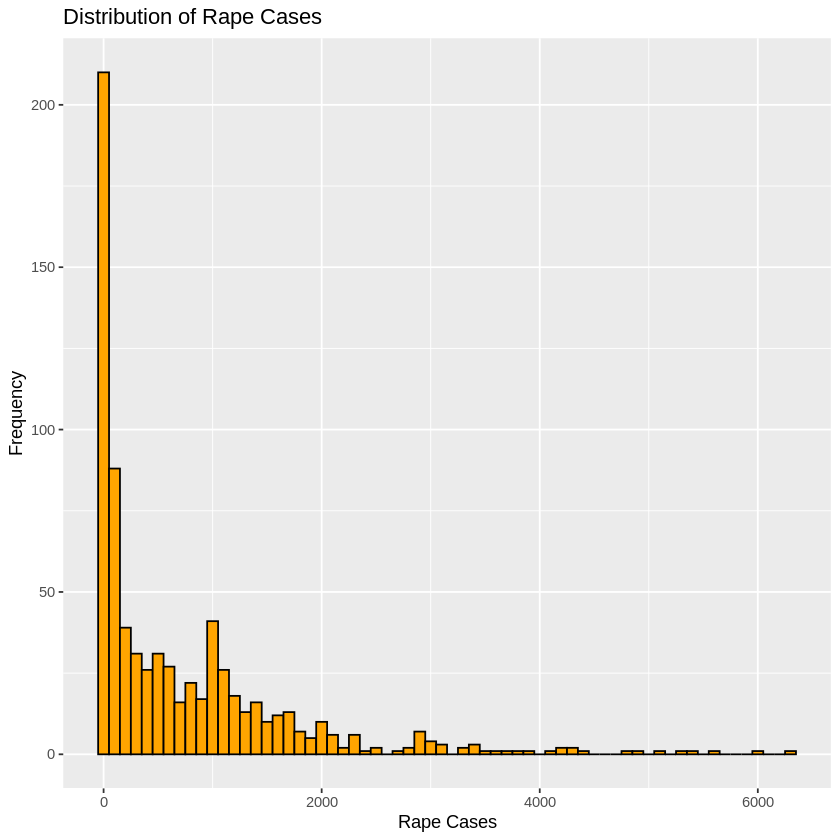

In [ ]:
# Histogram: Distribution of Rape cases across states
ggplot(data, aes(x = Rape)) +
  geom_histogram(binwidth = 100, fill = "orange", color = "black") +
  labs(title = "Distribution of Rape Cases", x = "Rape Cases", y = "Frequency")

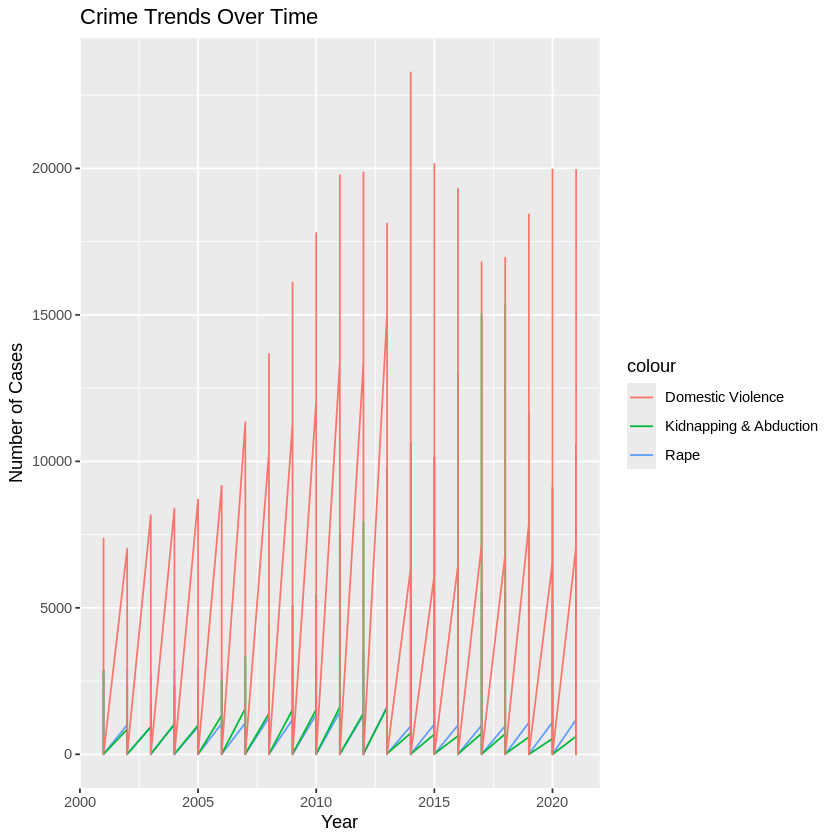

In [26]:
# Timeline Chart: Crime Cases (Rape, K&A, etc.) over Time
# Assuming you have a 'Year' column in the dataset
ggplot(data, aes(x = Year)) +
  geom_line(aes(y = Rape, color = "Rape")) +
  geom_line(aes(y = K.A, color = "Kidnapping & Abduction")) +
  geom_line(aes(y = DV, color = "Domestic Violence")) +
  labs(title = "Crime Trends Over Time", x = "Year", y = "Number of Cases")


**In year 2014 Highest Domestic Violenc Cases Reported**

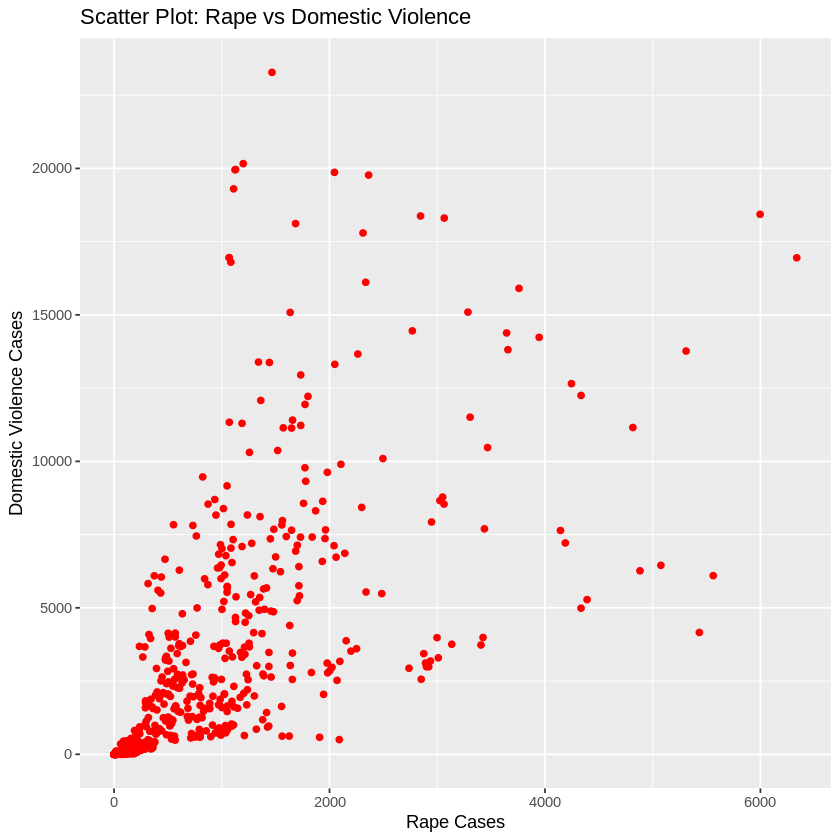

In [27]:
# Scatter Plot: Rape vs Domestic Violence
ggplot(data, aes(x = Rape, y = DV)) +
  geom_point(color = "red") +
  labs(title = "Scatter Plot: Rape vs Domestic Violence", x = "Rape Cases", y = "Domestic Violence Cases")


**As the number of rape cases increases, there tends to be an increase in domestic violence cases as well.**

Loading required package: viridisLite



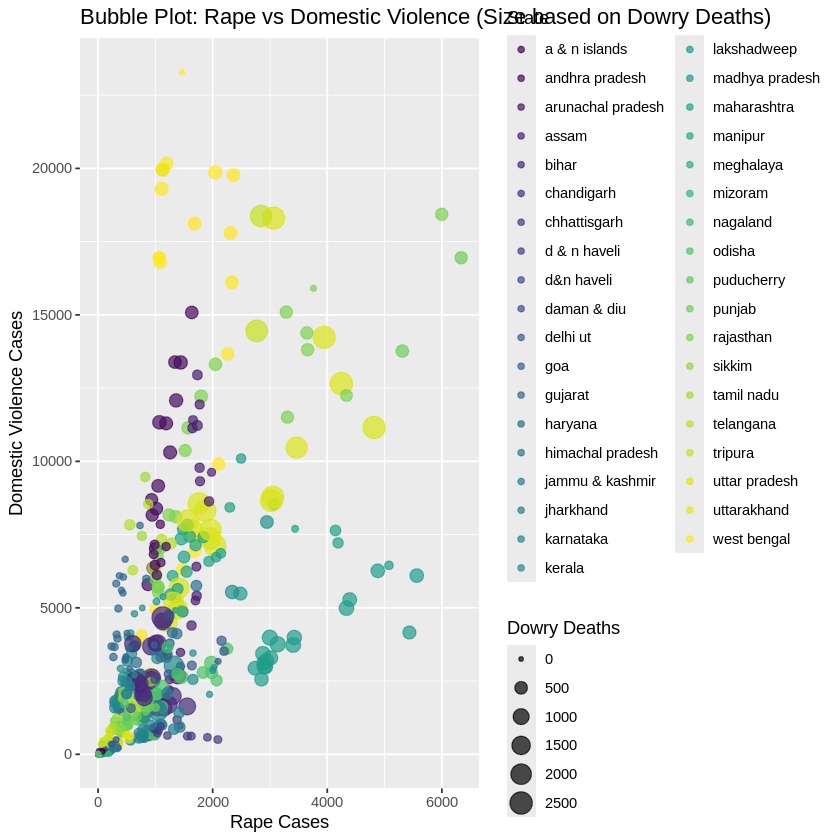

In [33]:
library(ggplot2)
library(viridis)  # For a perceptually uniform color paletteERROR while rich displaying an object: Error in `palette()`:
! Insufficient values in manual scale. 37 needed but only 12 provided.

# Generate a set of colors for the number of states
num_states <- length(unique(data$State))
colors <- viridis(num_states)

# Create the bubble plot with unique colors for each state
ggplot(data, aes(x = Rape, y = DV, size = DD, color = State, fill = State)) +
  geom_point(alpha = 0.7) +
  labs(title = "Bubble Plot: Rape vs Domestic Violence (Size based on Dowry Deaths)",
       x = "Rape Cases", y = "Domestic Violence Cases", size = "Dowry Deaths") +
  scale_color_manual(values = colors) +
  scale_fill_manual(values = colors)


**Observation :- West Bengal Has highesh Dowry Deaths**